In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import seaborn as sb

In [3]:
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [4]:
from scipy.sparse import dok_matrix, csr_matrix

In [5]:
tr = pd.read_csv('../data/train.csv')
tr.head(5)

,mid,radiant_won
0,44380,1
1,19687,1
2,10801,0
3,32220,1
4,23207,1


In [6]:
ts = pd.read_csv('../data/test.csv')
ts.head(5)

,mid
0,36193
1,7390
2,1018
3,2960
4,27102


In [7]:
hr = pd.read_csv('../data/heroes.csv')
hr.head(5)

,mid,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,91,42,87,15,65,11,6,34,69,74
1,1,69,85,71,24,64,74,68,39,65,11
2,2,17,40,31,67,99,32,7,72,48,104
3,4,25,15,75,29,95,3,32,55,64,86
4,5,65,6,81,25,71,75,42,101,96,109


In [8]:
hrtr = pd.merge(tr, hr, on = 'mid')
hrts = pd.merge(ts, hr, on = 'mid')

In [9]:
hrtr.head(5)

,mid,radiant_won,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,44380,1,76,96,92,72,64,15,86,75,29,11
1,19687,1,1,64,90,29,11,71,101,74,86,66
2,10801,0,35,75,41,110,19,7,69,86,11,72
3,32220,1,106,11,76,6,77,104,18,96,64,55
4,23207,1,8,75,1,88,69,11,39,82,24,55


In [10]:
hrts.head(5)

,mid,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,36193,64,50,3,75,71,81,90,92,44,94
1,7390,3,1,89,15,64,26,14,33,87,86
2,1018,61,96,13,82,32,102,28,90,107,46
3,2960,27,3,101,15,44,20,21,90,5,29
4,27102,15,101,69,3,104,49,66,67,81,16


In [11]:
radt = ['player_{i}'.format(i = i) for i in range(0, 5)]
dire = ['player_{i}'.format(i = i) for i in range(5, 10)]

In [12]:
cmnd = [*radt, *dire]

In [13]:
nheroes = len(np.unique(hrtr[cmnd].to_numpy()))
nheroes

111

In [14]:
def to_csr(data, nheroes = None):
    nhrs = len(np.unique(hrtr[cmnd].to_numpy())) if nheroes is None else nheroes
    nrows, ncols = data[cmnd].shape
    dradt, ddire = data[radt].to_numpy(), data[dire].to_numpy()
    mod_data = np.hstack((dradt, ddire + nhrs))
    frows = np.repeat(data.index.to_numpy(), ncols)
    fcols = mod_data.reshape(ncols * nrows)
    return csr_matrix((np.ones(ncols * nrows, dtype = np.float32), (frows, fcols)))

In [15]:
csr_hrtr, csr_hrts = to_csr(hrtr), to_csr(hrts)

In [16]:
hrtr_res = hrtr['radiant_won']

In [22]:
res = []
ks = [*range(2, 50, 1)]
for k in ks:
    def weights(distances):
        res = np.ones(distances.shape)
        #not to take into account the point itself
        res[:, 0] = 0.
        return res
    model = KNeighborsClassifier(algorithm = 'brute', n_jobs = 15, n_neighbors = k, weights = weights)
    model.fit(csr_hrtr, hrtr_res)
    pr = model.predict(csr_hrtr)
    res.append(roc_auc_score(hrtr_res, pr))

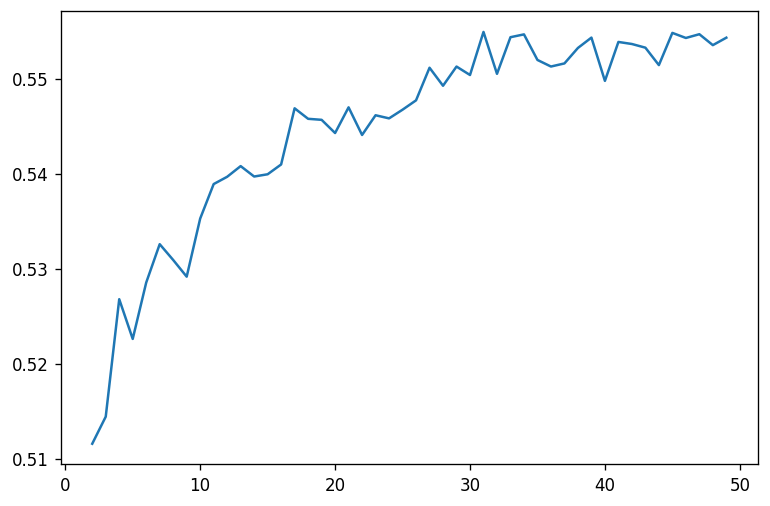

In [23]:
plt.figure(figsize = (7.5, 5.), dpi = 120)
plt.plot(ks, res)

In [24]:
max(res)

0.5549048858769744

In [25]:
np.argmax(res)

29

In [26]:
ks[np.argmax(res)]

17